In [1]:
import sys 
sys.path.append('/home/pierre-edouard/Desktop/ICL/Git_LHCb')

import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from scipy import interpolate
import time 
from tqdm import tqdm
import csv 
import seaborn as sns


import b_meson_fit as bmf 
from toy_minuit import toy
from test_iminuit import amplitude_latex_names ,amplitude_names, LaTex_labels , Standard_labels  , fix_array , fix_alphas , fix_one_alpha , fix_alpha_beta  ,fix_alpha_beta_gamma5


In [2]:
#first we need to generate some data ...

N_events=2400

toy_signalSM=toy('SM')
toy_signalNP=toy('NP')

toy_signalSM.generate(events=N_events , verbose=True)
toy_signalNP.generate(events=N_events , verbose=True)


Ideal coeffs for  SM  :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Time taken to generate data: 4.148130655288696
Ideal coeffs for  NP  :  [-3.4277496, -0.12410027, 6.045281, 0.009340614, -0.0019891937, 0.50341135, -0.25086978, -0.005180213, 8.636745, 0.22209263, -0.017419353, -0.5280673, 3.0646408, 0.078515366, -8.841145, -0.113660336, 0.00929356, -0.047615465, -0.933267, 0.016867112, -6.3185554, 0.0, 0.0, 0.0, 5.882883, -0.18442497, 8.101398, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
Time taken to generate data: 4.062183856964111


In [4]:
X=[]
print(fix_array)
fix_array=[0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           0, 0, 0,
           1, 1, 1,
           0, 0, 0,
           1, 1, 1,
           1, 1, 1,
           1, 1, 1,
           0, 1, 1, 
           0, 1, 1, 
           0, 1, 1, 
           0, 1, 1]

#fix_array=fix_alphas
print(fix_array)

for j in tqdm(range(10)):
    optimizeTF , coeffff = toy_signalSM.tf_fit(init= 'SAME SIGN' , fixed=fix_array , verbose=False)
    X.append(coeffff)
    print('ID : ',toy_signalSM.coeffs)
    print('FIT :', coeffff)
X=np.asarray(X)



  0%|          | 0/10 [00:00<?, ?it/s]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]



 10%|█         | 1/10 [00:07<01:06,  7.40s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-4.0537605, -0.38087225, 7.776726, 0.86090213, -0.08964285, 0.7810111, -3.8925831, 0.66064113, 14.073812, 9.853634, -1.3072088, -11.5308485, 6.228375, 0.04477576, -12.414471, -1.4616147, 0.26259395, 2.8376641, -0.35405868, 0.19721545, -10.969929, 0.0, 0.0, 0.0, 9.62066, -0.25739726, 15.5993395, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0913675, 0.0, 0.0, 0.05011641, 0.0, 0.0, 0.52903175, 0.0, 0.0, 3.0082455, 0.0, 0.0]



 20%|██        | 2/10 [00:15<01:00,  7.50s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.281405, -0.31346402, 6.309903, 0.70158416, -0.073034875, 0.6357792, -3.1273696, 0.5313067, 11.414166, 8.056755, -1.0686983, -9.432043, 5.0767074, 0.036349937, -10.118007, -1.1834885, 0.21269311, 2.3038788, -0.23709787, 0.15277244, -8.998239, 0.0, 0.0, 0.0, 7.83963, -0.20985872, 12.708085, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7039529, 0.0, 0.0, 0.044695374, 0.0, 0.0, 0.43300647, 0.0, 0.0, 2.4480836, 0.0, 0.0]



 30%|███       | 3/10 [00:21<00:50,  7.28s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.6838672, -0.35072407, 7.075557, 0.78661597, -0.08193196, 0.7142454, -3.5656283, 0.6048031, 12.874936, 9.00095, -1.1936696, -10.533076, 5.7069845, 0.03918073, -11.368373, -1.3394165, 0.24045438, 2.5993109, -0.33465046, 0.18159686, -10.010824, 0.0, 0.0, 0.0, 8.793723, -0.23529947, 14.257993, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9115871, 0.0, 0.0, 0.04649172, 0.0, 0.0, 0.48263747, 0.0, 0.0, 2.7491424, 0.0, 0.0]



 40%|████      | 4/10 [00:29<00:44,  7.46s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-2.713752, -0.2554063, 5.207154, 0.57725084, -0.06011771, 0.522454, -2.6123266, 0.44312918, 9.434647, 6.6019893, -0.87567025, -7.7253175, 4.1731815, 0.029919501, -8.317814, -0.97746503, 0.17570849, 1.8986049, -0.23517175, 0.1317922, -7.3511524, 0.0, 0.0, 0.0, 6.4455943, -0.17249483, 10.449565, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4010555, 0.0, 0.0, 0.03377546, 0.0, 0.0, 0.35408556, 0.0, 0.0, 2.015352, 0.0, 0.0]



 50%|█████     | 5/10 [00:37<00:37,  7.53s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-2.7624264, -0.26411992, 5.3123956, 0.590927, -0.06151654, 0.5352914, -2.6343281, 0.44751891, 9.613349, 6.7850323, -0.8999691, -7.9432893, 4.27583, 0.03056177, -8.521639, -0.9962113, 0.17906377, 1.939573, -0.20009515, 0.12871258, -7.577487, 0.0, 0.0, 0.0, 6.6019444, -0.17669404, 10.702751, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4350147, 0.0, 0.0, 0.037703898, 0.0, 0.0, 0.36460355, 0.0, 0.0, 2.0616834, 0.0, 0.0]



 60%|██████    | 6/10 [00:44<00:29,  7.48s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.1700754, -0.30256775, 6.095055, 0.6773407, -0.07049775, 0.6142812, -3.0186324, 0.51296675, 11.02081, 7.7781386, -1.0318199, -9.105744, 4.903786, 0.034958143, -9.772715, -1.1440703, 0.2055621, 2.2263703, -0.23098247, 0.14787939, -8.687763, 0.0, 0.0, 0.0, 7.570715, -0.2026352, 12.273082, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6455641, 0.0, 0.0, 0.042910647, 0.0, 0.0, 0.4183122, 0.0, 0.0, 2.3642282, 0.0, 0.0]



 70%|███████   | 7/10 [00:51<00:21,  7.17s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.5408075, -0.33667475, 6.8037395, 0.7558204, -0.07869176, 0.6847388, -3.3883371, 0.5753359, 12.318367, 8.667953, -1.149697, -10.146064, 5.4684587, 0.039072447, -10.898615, -1.2768778, 0.22949861, 2.4836822, -0.27665827, 0.16779682, -9.666872, 0.0, 0.0, 0.0, 8.443945, -0.2260031, 13.688523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8353701, 0.0, 0.0, 0.046702534, 0.0, 0.0, 0.46551055, 0.0, 0.0, 2.6380978, 0.0, 0.0]



 80%|████████  | 8/10 [00:58<00:14,  7.18s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-2.465908, -0.23337369, 4.734214, 0.5253943, -0.054707173, 0.4760582, -2.3693953, 0.40222856, 8.580802, 6.000498, -0.7959495, -7.0200095, 3.804722, 0.026776582, -7.5812936, -0.8908756, 0.16004853, 1.7301475, -0.2101854, 0.119351655, -6.6997185, 0.0, 0.0, 0.0, 5.870196, -0.15709175, 9.517107, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2759925, 0.0, 0.0, 0.031057278, 0.0, 0.0, 0.32259804, 0.0, 0.0, 1.8347038, 0.0, 0.0]



 90%|█████████ | 9/10 [01:05<00:07,  7.16s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-3.6321766, -0.3427364, 6.973212, 0.7727524, -0.080456525, 0.7004555, -3.4718077, 0.58954394, 12.604204, 8.856369, -1.1749415, -10.365345, 5.58956, 0.04021157, -11.141004, -1.3075873, 0.23499632, 2.541567, -0.29108426, 0.17298092, -9.876398, 0.0, 0.0, 0.0, 8.63432, -0.23104714, 13.997887, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.876779, 0.0, 0.0, 0.04658569, 0.0, 0.0, 0.47587696, 0.0, 0.0, 2.6983764, 0.0, 0.0]



100%|██████████| 10/10 [01:12<00:00,  7.12s/it]

ID :  [-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]
FIT : [-2.7283106, -0.26002604, 5.2443852, 0.58280396, -0.060674615, 0.52824265, -2.6055765, 0.44256592, 9.4913225, 6.688459, -0.88719964, -7.8296037, 4.21831, 0.030070582, -8.40673, -0.98451203, 0.17691791, 1.9153768, -0.20630507, 0.12834631, -7.464313, 0.0, 0.0, 0.0, 6.512572, -0.17432643, 10.557474, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4155562, 0.0, 0.0, 0.036510106, 0.0, 0.0, 0.35939512, 0.0, 0.0, 2.0342128, 0.0, 0.0]


Order : 0
Re($A_{\parallel}^L$)
[-4.1781025  -0.15184344  6.8183246 ]
[-3.203249   -0.30399653  6.153234  ]


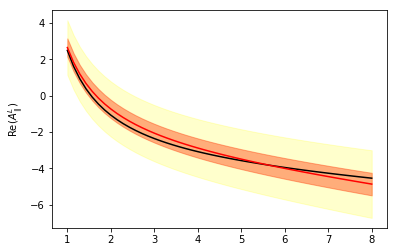

Order : 1
Im($A_{\parallel}^L$)
[ 0.00858538 -0.001823    0.4660742 ]
[ 1.156212  -0.2077537 -2.2476172]


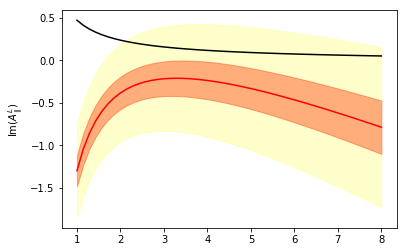

Order : 2
Re($A_{\parallel}^R$)
[-2.3538125e-01 -4.3176315e-03  8.0037451e+00]
[-3.0685985  0.521004  11.142641 ]


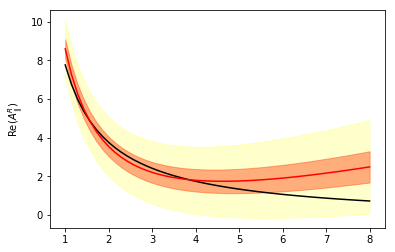

Order : 3
Im($A_{\parallel}^R$)
[ 0.16564202 -0.01309588 -0.30668017]
[-0.68313915  0.07112717 -0.6192557 ]


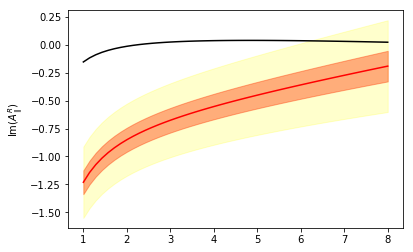

Order : 4
Re($A_{\bot}^L$)
[ 3.8864067   0.08526551 -8.197446  ]
[ 4.944592   0.0351877 -9.854067 ]


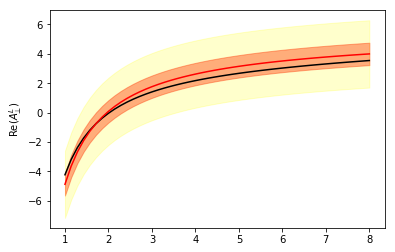

Order : 5
Im($A_{\bot}^L$)
[-0.09505176  0.00793401 -0.07297003]
[-7.828978   1.0384823  9.163134 ]


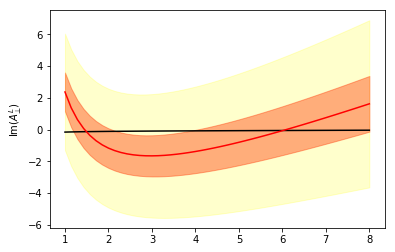

Order : 6
Re($A_{\bot}^R$)
[-0.4235836   0.02729899 -7.147451  ]
[-0.25762895  0.15284446 -8.730269  ]


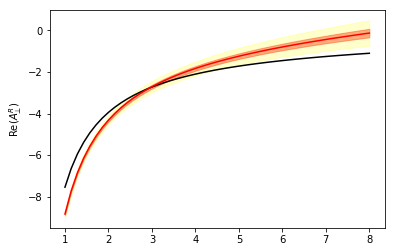

Order : 7
Im($A_{\bot}^R$)
[0. 0. 0.]
[0. 0. 0.]


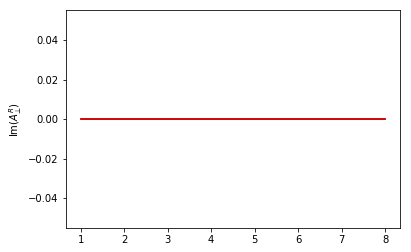

Order : 8
Re($A_{0}^L$)
[ 7.202759  -0.2278163  9.89863  ]
[ 7.6333303  -0.20428482 12.375181  ]


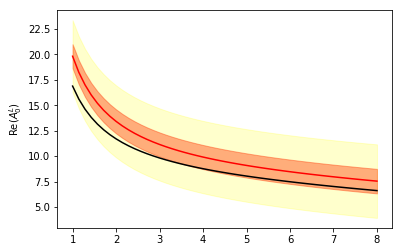

Order : 9
Im($A_{0}^L$)
[0. 0. 0.]
[0. 0. 0.]


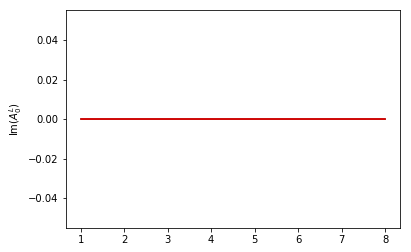

Order : 10
Re($A_{0}^R$)
[0. 0. 0.]
[0. 0. 0.]


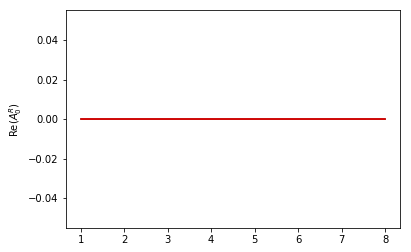

Order : 11
Im($A_{0}^R$)
[0. 0. 0.]
[0. 0. 0.]


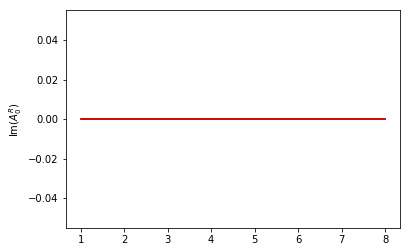

Order : 12
Re($A_{00}^L$)
[1. 0. 0.]
[1.6592239 0.        0.       ]


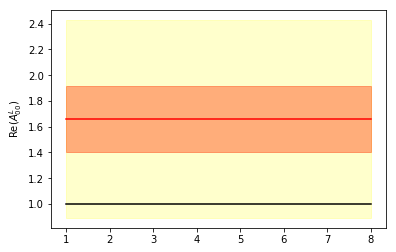

Order : 13
Im($A_{00}^L$)
[1. 0. 0.]
[0.04165491 0.         0.        ]


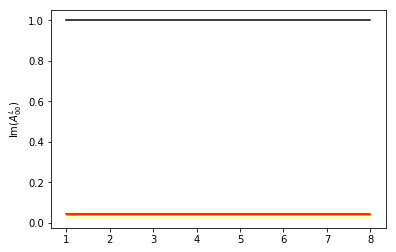

Order : 14
Re($A_{00}^R$)
[1. 0. 0.]
[0.42050576 0.         0.        ]


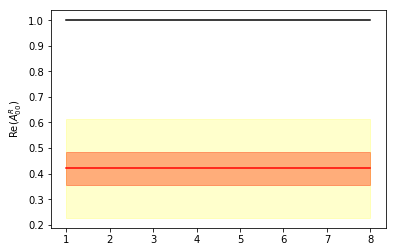

Order : 15
Im($A_{00}^R$)
[1. 0. 0.]
[2.3852124 0.        0.       ]


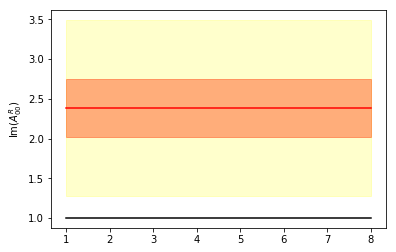

In [7]:
for I in range(16):
    print('Order :', I)
    param=Pseudo[I]*AV[int(OrderII[I])]
    err=Pseudo[I]*STD[int(OrderII[I]),:]
    ex=ID[I,:]
    print(names[I])
    print(ex)
    print(param)
    plt.plot(x , ansatz(ex[0] , ex[1] , ex[2] , x) , 'k')

    plt.fill_between(x , ansatz(param[0] , param[1] , param[2] , x) - error1(err[0],err[1],err[2], x) , 
                     ansatz(param[0] , param[1] , param[2] , x) + error1(err[0],err[1],err[2], x)  , alpha=0.4 , color='red')
    plt.fill_between(x , ansatz(param[0] , param[1] , param[2] , x) - 3*error1(err[0],err[1],err[2], x) , 
                     ansatz(param[0] , param[1] , param[2] , x) + 3*error1(err[0],err[1],err[2], x)  , alpha=0.2 , color='yellow')

    #plt.plot(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) -error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x)) 
    plt.plot(x , ansatz(param[0] , param[1] , param[2] , x), 'r')
    plt.ylabel(amplitude_latex_names[I])
    plt.show()
#plt.plot(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) + error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x))


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]
Re($A_{\parallel}^L$)
Re($A_{\bot}^L$)
[-3.203249   -0.30399653  6.153234  ]
[ 4.944592   0.0351877 -9.854067 ]


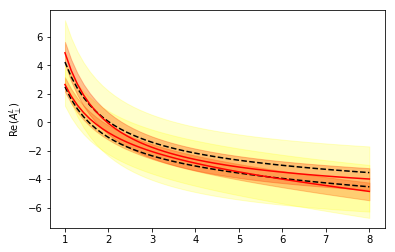

Im($A_{\parallel}^L$)
Im($A_{\bot}^L$)
[ 1.156212  -0.2077537 -2.2476172]
[-7.828978   1.0384823  9.163134 ]


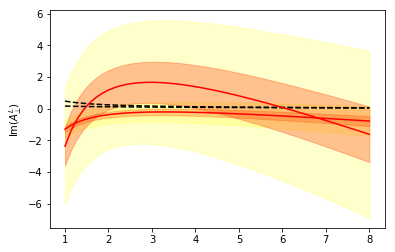

Re($A_{\parallel}^R$)
Re($A_{\bot}^R$)
[-3.0685985  0.521004  11.142641 ]
[-0.25762895  0.15284446 -8.730269  ]


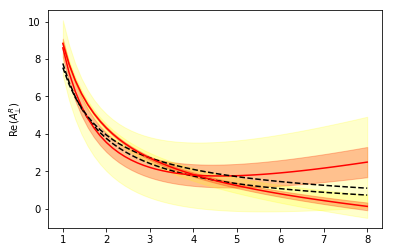

Im($A_{\parallel}^R$)
Im($A_{\bot}^R$)
[-0.68313915  0.07112717 -0.6192557 ]
[0. 0. 0.]


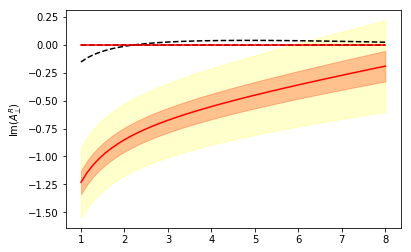

Re($A_{\bot}^L$)
Re($A_{\parallel}^L$)
[ 4.944592   0.0351877 -9.854067 ]
[-3.203249   -0.30399653  6.153234  ]


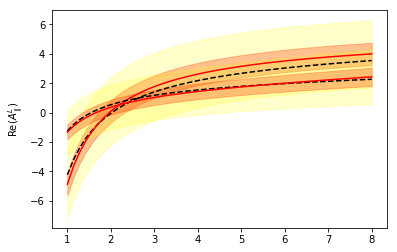

Im($A_{\bot}^L$)
Im($A_{\parallel}^L$)
[-7.828978   1.0384823  9.163134 ]
[ 1.156212  -0.2077537 -2.2476172]


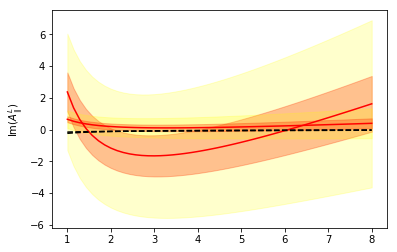

In [6]:
#Want to check for degeneracies 

x=np.linspace(1,8,50)

names=amplitude_latex_names

#print( toy_signalSM.coeffs[0] , toy_signalSM.coeffs[1] , toy_signalSM.coeffs[2])
#print( np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]))
#print(X)


Average=[]
StandarD=[]
for i in range(48):
    Average.append(np.mean(X[:,i]))
    StandarD.append(np.std(X[:,i]))

AV=np.reshape(Average,(16,3))
STD=np.reshape(StandarD,(16,3))

def ansatz(alpha, beta, gamma, q2):
    return alpha + beta*q2 + gamma/q2

def error1(sig_alpha, sig_beta, sig_gamma, q2):
    return np.sqrt(sig_alpha**2 + sig_beta**2*q2**2 + sig_beta**2/(q2**2))

def error2(alpha, beta, gamma, sig_alpha, sig_beta, sig_gamma, q2):
    sigA=(sig_alpha/alpha)**2
    sigB=(sig_beta/beta)**2
    sigC=(sig_gamma/gamma)**2
    return ansatz(alpha, beta, gamma, q2)*np.sqrt(sigA+sigB+sigC)
    
ID=np.reshape(toy_signalSM.coeffs,(16,3))

OrderI=np.arange(16)
OrderII=np.array([0, 5, 2, 1, 4, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15])
Pseudo=np.array([1 , -1 , 1 , -1 , 1 , -1 , 1, 1, 1 , 1 , 1 , 1 ,1 ,1 ,1 ,1])



# aproximate degeneracies in A_para_l & (- A_perp_l) ,  A_perp_l & (- A_para_l/2) ,  A_para_r & (- A_perp_r)
# corresponds to 


DEGENERACIES_IDX=[[0,4], [1 , 5],  [2,6], [3,7] , [4,0] , [5,1]]
Epsilon=[[1 , -1],[1 , -1], [1 , -1] , [1, -1] , [1 , -0.5],[1 , -0.5]]

print(fix_array)

for J in range(len(DEGENERACIES_IDX)):
    
    
    id1=DEGENERACIES_IDX[J][0]
    param1=Pseudo[id1]*AV[int(OrderII[id1]),:]
    err1=Pseudo[id1]*STD[int(OrderII[id1]),:]
    ex1=ID[id1,:]

    id2=DEGENERACIES_IDX[J][1]
    param2=Pseudo[id2]*AV[int(OrderII[id2]),:]
    err2=Pseudo[id2]*STD[int(OrderII[id2]),:]
    ex2=ID[id2,:]

    print(names[id1])
    print(names[id2])
    PARAM=[param1 , param2]
    ERR=[err1 , err2]
    EX=[ex1,ex2]
    compare=[id1 , id2]


    for j in range(len(compare)):

        id1=compare[j]
        ex1=EX[j]
        param1=PARAM[j]
        print(param1)
        err1=ERR[j]
        fac=Epsilon[J][j]

        plt.plot(x , fac*ansatz(ex1[0] , ex1[1] , ex1[2] , x) , 'k--')
        
        dy=error1(err1[0],err1[1],err1[2], x)
        #dy=error2(param1[0] , param1[1] , param1[2] ,err1[0],err1[1],err1[2], x)
        plt.fill_between(x , fac*ansatz(param1[0] , param1[1] , param1[2] , x) - dy , 
                         fac*ansatz(param1[0] , param1[1] , param1[2] , x) + dy  , alpha=0.3 , color='red')
        plt.fill_between(x , fac*ansatz(param1[0] , param1[1] , param1[2] , x) - 3*dy , 
                         fac*ansatz(param1[0] , param1[1] , param1[2] , x) + 3*dy  , alpha=0.2 , color='yellow')

        #plt.plot(x , ansatz(np.mean(X[:,0]) , np.mean(X[:,1]) , np.mean(X[:,2]) , x) -error1(np.std(X[:,0]), np.std(X[:,1]), np.std(X[:,2]), x)) 
        plt.plot(x , fac*ansatz(param1[0] , param1[1] , param1[2] , x), 'r')
        plt.ylabel(amplitude_latex_names[id1])
    plt.show()


# Using the various data.csv files .. 


In [9]:
import pandas as pd

signal_coeffs = bmf.coeffs.signal(bmf.coeffs.SM)
Coef0=[i.numpy() for i in signal_coeffs] 
print(Coef0)


dataP = pd.read_csv("/home/pierre-edouard/Desktop/ICL/Git_LHCb/Minuit/Test_stats/data_Pierre.csv")
dataP = dataP.values

dataI = pd.read_csv("/home/pierre-edouard/Desktop/ICL/Git_LHCb/Minuit/Test_stats/data.csv")
dataI = dataI.values


[-4.1781025, -0.15184344, 6.8183246, 0.008585378, -0.0018230017, 0.4660742, -0.23538125, -0.0043176315, 8.003745, 0.16564202, -0.013095878, -0.30668017, 3.8864067, 0.08526551, -8.197446, -0.09505176, 0.007934013, -0.07297003, -0.4235836, 0.027298994, -7.147451, 0.0, 0.0, 0.0, 7.202759, -0.2278163, 9.89863, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0]


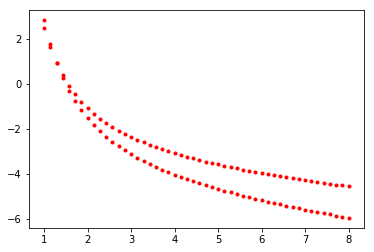

In [17]:
plt.plot(x , ansatz(np.mean(alpha) ,np.mean(beta), np.mean(gamma) , x) , 'r.')
plt.plot(x , ansatz(Coef0[0] ,Coef0[1], Coef0[2] , x) , 'r.')

# Using Lejambon error method 

10
[3.34209299 2.71503416 3.04096594 2.23799548 2.28584927 2.62241194
 2.92625731 2.03493209 2.99829873 2.25604862]


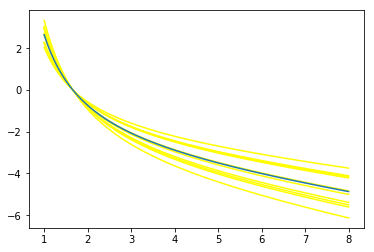

[ 2.64598865  2.2181483   1.84065166  1.50468858  1.2033913   0.93132713
  0.68414219  0.45830633  0.25092709  0.05961195 -0.11763522 -0.282493
 -0.43638311 -0.58051777 -0.7159369  -0.84353768 -0.96409825 -1.0782968
 -1.1867271  -1.28991129 -1.38831032 -1.48233269 -1.57234166 -1.65866141
 -1.74158208 -1.82136421 -1.89824234 -1.97242821 -2.04411349 -2.11347205
 -2.18066203 -2.24582752 -2.30910017 -2.37060042 -2.43043872 -2.48871652
 -2.5455272  -2.6009568  -2.65508478 -2.70798464 -2.7597244  -2.8103672
 -2.85997164 -2.90859224 -2.95627977 -3.00308155 -3.04904176 -3.09420169
 -3.13859999 -3.18227284 -3.22525416 -3.2675758  -3.30926769 -3.35035796
 -3.3908731  -3.43083806 -3.47027637 -3.50921024 -3.54766066 -3.58564744
 -3.62318934 -3.66030414 -3.69700865 -3.73331883 -3.76924982 -3.804816
 -3.84003102 -3.87490786 -3.90945887 -3.94369582 -3.97762989 -4.01127176
 -4.04463161 -4.07771915 -4.11054364 -4.14311393 -4.17543849 -4.20752541
 -4.23938241 -4.27101691 -4.302436   -4.33364647 -4.36465

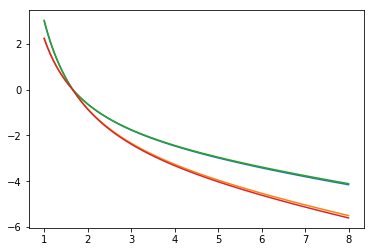

In [18]:
q2_range=np.linspace(bmf.signal.q2_min, bmf.signal.q2_max, 100)
x=np.linspace(1,8,100)

mean=np.reshape(np.mean(X , axis=0),(16,3))
data=[]
for j in range(len(X[:,0])):   
    data.append(ansatz(X[j,0],X[j,1],X[j,2],x))
    plt.plot(x , data[j] , 'yellow')
idx=0
#print(mean)


AV=np.mean(data , axis=0)
#print(AV)
data=np.asarray(data)
print(len(data[:,0]))
print(data[:,0])
plt.plot(x , AV)
plt.show()
min_68, max_68, min_95, max_95 = ([] for i in range(4))
print(AV)
print(AV[0])
above_mean=sorted(j for j in data[:,0] if j > AV[0])
print(above_mean)
for i, q2 in enumerate(q2_range):
    #print(sorted(data[:,i]))
    #print(AV[i])
    lim=AV[i]
    above_mean=sorted(j for j in data[:,i] if j > lim )
    below_mean=sorted(j for j in data[:,i] if j < lim ) 
    
    below_mean=sorted(below_mean, reverse=True)
    
    #print(above_mean)
    
    max_68.append(above_mean[int((len(above_mean) - 1) * 0.68)])
    max_95.append(above_mean[int((len(above_mean) - 1) * 0.95)])
    
    min_68.append(below_mean[int((len(below_mean) - 1) * 0.68)])
    min_95.append(below_mean[int((len(below_mean) - 1) * 0.95)])
    
    '''
    print(AV[i])
    print(above_mean )
    print(below_mean, '\n')
    #sorted(i for i in j if i >= ansatz(mean[]))
    '''
    
plt.plot(x , max_68)
plt.plot(x , min_68)
plt.plot(x , max_95)
plt.plot(x , min_95)
plt.show()